In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# http://archive.ics.uci.edu/ml/datasets/Adult
df = pd.read_csv('data/adult.csv')

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 1. Basic descriptive statistics

In [3]:
# Variable types
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

#### Numeric variables

In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
print(df['age'].mean())
print(df['age'].std())

38.58164675532078
13.640432553581341


In [6]:
print(df['age'].median())

## p-quantile
# 1st quantile
Q1 = df['age'].quantile(0.25)

# 3rd quantile
Q3 = df['age'].quantile(0.75)

# IQR
IQR = Q3 - Q1

37.0


#### Categorical variables

In [7]:
df.describe(include='O')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [8]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [9]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

# 2. Descriptive statistics - Visualization

#### Numeric variables

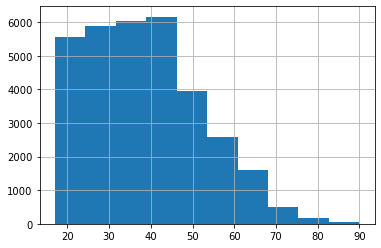

In [10]:
df['age'].hist()
plt.show()

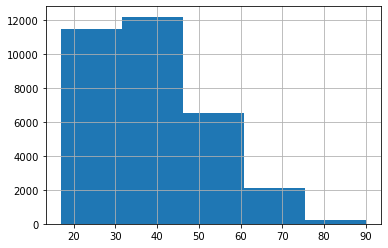

In [11]:
df['age'].hist(bins=5)
plt.show()

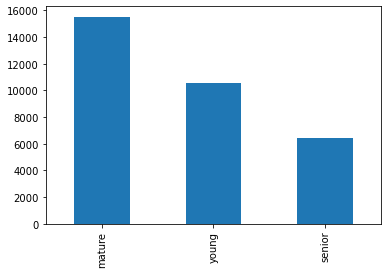

In [12]:
# Numeric -> category
df['age-category'] = pd.cut(df['age'], [0,30,50,100], labels=['young', 'mature', 'senior'])

df['age-category'].value_counts().plot.bar()
plt.show()

#### Categorical variables

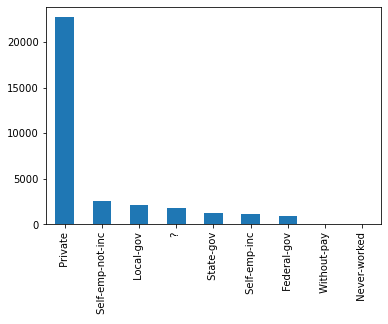

In [13]:
df['workclass'].value_counts().plot.bar()
plt.show()

# 3. Convert data types

In [14]:
df['age'] = df['age'].astype('float')
df['education'] = df['education'].astype('category')

#### Label encoder

In [15]:
df['education'].head()

0     Bachelors
1     Bachelors
2       HS-grad
3          11th
4     Bachelors
Name: education, dtype: category
Categories (16, object): [' 10th', ' 11th', ' 12th', ' 1st-4th', ..., ' Masters', ' Preschool', ' Prof-school', ' Some-college']

In [16]:
df['education-codes'] = df['education'].cat.codes

df['education-codes'].head()

0     9
1     9
2    11
3     1
4     9
Name: education-codes, dtype: int8

#### One-hot encoder

In [17]:
df['education'].head()

0     Bachelors
1     Bachelors
2       HS-grad
3          11th
4     Bachelors
Name: education, dtype: category
Categories (16, object): [' 10th', ' 11th', ' 12th', ' 1st-4th', ..., ' Masters', ' Preschool', ' Prof-school', ' Some-college']

In [18]:
pd.get_dummies(df['education']).head()

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


#### Dummy encoder

In [19]:
pd.get_dummies(df['education'], drop_first=True).head()

,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
